In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
 
class retirement_plan:
    """
    A retirement plan. 
    """
 
    def __init__(self, balance_start = 70000, salary_start = 150000, salary_retired = 80000, salary_growth = 0.02, 
                inflation = 0.025, annual_return = 0.06, savings_rate = 0.23, age_start = 41, age_retirement = 67, mute=True):
        """
        Initializes the retirement plan with the following parameters:
         
        balance_start: starting balance in dollars (default = $70,000)
        salary_start: gross salary in dollars per year (default = $150,000)
        salary_retired: yearly withdrawal AFTER Social Security, in current dollars (default = $80,000)
        salary_growth: percentage annual salary raise (default = 0.025)     
        inflation: percentage inflation (default = 0.025)     
        savings_rate: percentage of yearly gross salary going to savings (default =0.23)     
        age_start: starting age in years (default = 41) 
        age_retirement: age starting retirement in years (default = 67)
        annual_return: percentage annual return on investments (default = 0.06)
        mute: switch off (False) for printing output (default = True (muted))
        """
        self.balance_start = balance_start
        self.salary_start = salary_start
        self.salary_retired = salary_retired
        self.salary_growth = salary_growth
        self.inflation = inflation
        self.annual_return = annual_return
        self.savings_rate = savings_rate
        self.age_start = age_start
        self.age_retirement = age_retirement
        self.mute = mute

    def calculate(self): 
        self.age_list = []
        self.balance_list = []
        self.salary_list = []
        age = self.age_start
        balance = self.balance_start
        salary = self.salary_start
        salary_retired = self.salary_retired
        if not self.mute:
            print("age", "balance", "salary", "salary_retired")
 
        # Accumulation Phase:
        while age < self.age_retirement:
            # Values at the start of the year
            if not self.mute:
                print(age, round(balance), round(salary), round(salary_retired))
            self.age_list.append(age)
            self.balance_list.append(round(balance))
            self.salary_list.append(round(salary))
 
            #Yearly savings and return on investment, compounding monthly
            yearly_savings = self.savings_rate*salary
            for month in range(12):
                balance += yearly_savings/12.
                balance *= (1+self.annual_return)**(1./12)
     
            # Salary raise and inflation correction at the end of the year
            salary += salary*self.salary_growth
            salary_retired += salary_retired*self.inflation 
 
            # Turn older at the end of the year
            age += 1
 
        # Retirement Phase:
        while (balance > 0) & (age < 121):
            # Values at the start of the year
            salary = round(salary_retired)
            balance -= salary      
            if not self.mute:
                print(age, round(balance), round(salary), round(salary_retired))
         
            self.age_list.append(age)                  
            self.balance_list.append(round(balance))
            self.salary_list.append(salary)
 
            #Yearly return on investment, compounding monthly
            for month in range(12):
                balance *= (1+self.annual_return)**(1./12)
 
            # Salary inflation correction at the end of the year
            salary_retired += salary_retired*self.inflation
 
            # Turn older at the end of the year
            age += 1   
            
        self.age_zero = self.age_list[-1]
    
    def summary(self):
        age_index = self.age_list.index(self.age_retirement)
        print("Balance at retirement: ${0:.0f}".format(self.balance_list[age_index]))
        print("Salary at retirement: ${0:.0f}".format(self.salary_list[age_index]))
        print("Starting withdrawal is {0:.1f}% of savings".format(100.*self.salary_list[age_index]/self.balance_list[age_index])) 
        if self.age_zero == 120:
            print("You'll never run out of money!")
        else:
            print("You'll run out of money when you are:", self.age_zero)
 
    def plot(self):
        age_index = self.age_list.index(self.age_retirement)
        fig, (ax1) = plt.subplots(1, sharex=False, figsize=(6,6))
        ax1.plot(self.age_list,self.balance_list)
        ax1.set_title('Savings vs Age')
        ax1.set_ylabel('Total Savings')
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax1.yaxis.set_major_formatter(tick) 
        ax1.tick_params(axis='both', which='major', labelsize=16)    
        ax1.grid(True)
        plt.xlabel('Age')
        for ax in [ax1]:
            ax.axvline(x=self.age_retirement, linestyle = '--', color='blue')
            if self.age_zero < 120:
                ax.axvline(x=self.age_zero, linestyle = '--', color='red')
        ax1.text(self.age_retirement, 0.85*self.balance_list[age_index], 'Retirement at '+str(self.age_retirement), 
                 horizontalalignment='center', fontsize=12, bbox=dict(boxstyle = "square", facecolor = "white"))
        if self.age_zero < 120:
          ax1.text(self.age_zero, 0.15*self.balance_list[age_index], 'Out of money at '+str(self.age_zero), 
                 horizontalalignment='center', fontsize=12, bbox=dict(boxstyle = "square", facecolor = "white"))
        #plt.savefig('retirement_plan.png', bbox_inches = 'tight')


In [3]:
#-----------------------------------------
# ADD YOUR INPUT HERE, THEN RUN THIS CELL:
#-----------------------------------------
balance_start = 20000   # starting balance 
age_start = 40        # starting age in years
age_retirement = 67     # age starting retirement in years
savings_rate = 0.10      # fraction of yearly gross salary going to savings
salary_start = 130000   # gross yearly salary 
salary_retired = 77000  # yearly withdrawal AFTER Social Security and other benefits (not corrected for inflation)
salary_growth = 0.025   # percentage annual salary raise (in decimal notation) 
inflation = 0.025       # percentage inflation (in decimal notation) 
annual_return = 0.08    # percentage annual return on your investments (in decimal notation)
#-----------------------------------------

plan = retirement_plan(balance_start = balance_start, age_start = age_start, 
                       age_retirement = age_retirement, savings_rate = savings_rate, 
                       salary_start = salary_start, salary_retired = salary_retired, 
                       salary_growth = salary_growth, inflation = inflation, 
                       annual_return = annual_return)

In [4]:
plan.calculate()
plan.summary()

Balance at retirement: $1498618
Salary at retirement: $149981
Starting withdrawal is 10.0% of savings
You'll run out of money when you are: 82


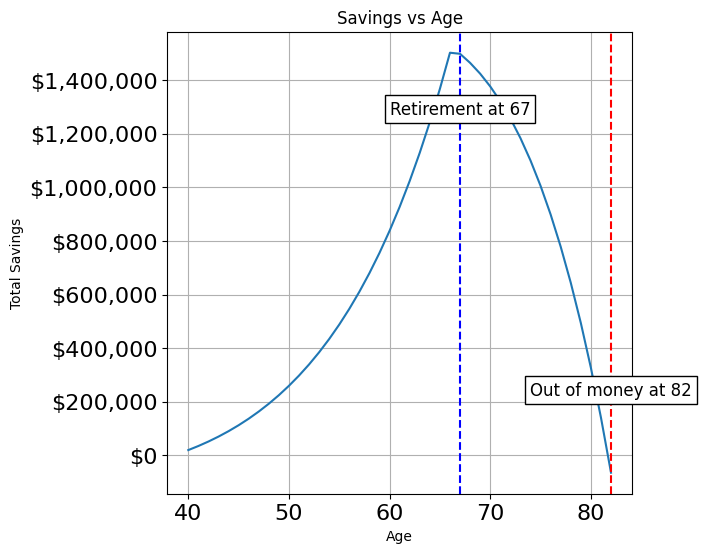

In [5]:
plan.plot()